In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas_datareader.data as web

In [152]:
apple = web.DataReader('aapl'
                       , 'yahoo'
                       , start = '12/12/1980'
                      )
apple.shape

(10091, 6)

In [153]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615


In [154]:
apple['Close_Shift1_DOwn'] = apple.Close.shift(1, fill_value = 0.0)
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn
Date,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513


In [155]:
# Function to find the max daily change in the direction of overall daily change 
def hl(h, l, o, c):
    if o - c > 0:
        return l-h
    else:
        return h-l

In [156]:
# Max daily change in the same direction fo daily change
apple['Max Daily Change'] = apple.apply(lambda x: hl(x[0], x[1], x[2], x[3]), axis=1)
apple.sample(10)

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change
Date,,,,,,,,
1982-10-08,0.105469,0.097098,0.097656,0.104911,275542400.0,0.082627,0.097656,0.008371
2012-03-28,22.194643,21.796785,22.084999,22.057858,655460400.0,19.028233,21.945715,-0.397858
2020-10-02,115.370003,112.220001,112.889999,113.019997,144712000.0,112.825348,116.790001,3.150002
1991-06-28,0.379464,0.359375,0.377232,0.370536,226643200.0,0.303786,0.379464,-0.020089
2015-01-09,28.312500,27.552500,28.167500,28.002501,214798000.0,25.508888,27.972500,-0.760000
1984-10-12,0.106585,0.100446,0.106027,0.101562,265798400.0,0.079990,0.106027,-0.006138
1999-06-01,0.404576,0.396205,0.401786,0.400112,461025600.0,0.345157,0.393415,-0.008371
2003-06-19,0.350179,0.335179,0.345714,0.341786,381528000.0,0.294842,0.341429,-0.015000
2018-06-01,47.564999,46.937500,46.997501,47.560001,93770000.0,46.131493,46.717499,0.627499


In [157]:
# negative means the next day opened lower than the pervious day
apple['Interday Change'] = apple.apply(lambda x: x[2] - x[6], axis = 1)
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change
Date,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348,-0.000558,-0.006138
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652,-0.000558,-0.008371
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348


In [158]:
# Positive 'Close Adjusted Close' means overvalued price at close of day
apple['Close Adjusted Close'] = apple.apply(lambda x: x[3] - x[5], axis = 1)
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close
Date,,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348,0.027262
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348,-0.000558,-0.006138,0.025839
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652,-0.000558,-0.008371,0.023943
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790,0.024535
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348,0.025247


In [159]:
apple[(apple['Max Daily Change'] > 0) & (apple['Interday Change'] < 0)]

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close
Date,,,,,,,,,,
1986-03-17,0.116071,0.113281,0.116071,0.116071,118720000.0,0.091418,0.116629,0.002790,-0.000558,0.024654
1986-08-01,0.141741,0.138951,0.138951,0.140067,150080000.0,0.110316,0.139509,0.002790,-0.000558,0.029751
1986-08-12,0.153460,0.148996,0.148996,0.152902,244160000.0,0.120425,0.149554,0.004464,-0.000558,0.032477
1986-08-19,0.158482,0.154576,0.156808,0.157924,137782400.0,0.124381,0.157924,0.003906,-0.001116,0.033544
1986-08-20,0.162946,0.157366,0.157366,0.161830,171315200.0,0.127457,0.157924,0.005580,-0.000558,0.034373
...,...,...,...,...,...,...,...,...,...,...
2020-11-16,120.989998,118.150002,118.919998,120.300003,91183000.0,120.300003,119.260002,2.839996,-0.340004,0.000000
2020-11-19,119.059998,116.809998,117.589996,118.639999,74113000.0,118.639999,118.029999,2.250000,-0.440002,0.000000
2020-12-02,123.370003,120.889999,122.019997,123.080002,89004200.0,123.080002,122.720001,2.480003,-0.700005,0.000000


In [160]:
apple[apple['Open'] == apple['Close']]

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close
Date,,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348,0.027262
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790,0.024535
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348,0.025247
1980-12-19,0.126674,0.126116,0.126116,0.126116,48630400.0,0.099329,0.118862,0.000558,0.007254,0.026787
1980-12-22,0.132812,0.132254,0.132254,0.132254,37363200.0,0.104163,0.126116,0.000558,0.006138,0.028091
...,...,...,...,...,...,...,...,...,...,...
2014-07-01,23.517500,23.282499,23.379999,23.379999,152892000.0,21.101110,23.232500,0.235001,0.147499,2.278889
2015-07-28,30.977501,30.637501,30.844999,30.844999,134472400.0,28.326986,30.692499,0.340000,0.152500,2.518013
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.944889,43.750000,0.420002,-0.162498,1.642612


In [161]:
apple['Open Close % Change'] = (apple['Close'] - apple['Open']) / apple['Open'] * 100
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close,Open Close % Change
Date,,,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348,0.027262,0.000000
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348,-0.000558,-0.006138,0.025839,-0.456625
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652,-0.000558,-0.008371,0.023943,-0.492609
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790,0.024535,0.000000
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348,0.025247,0.000000


In [162]:
apple['Open Close % Change'].describe()

count    10091.000000
mean        -0.010760
std          2.343740
min        -24.352329
25%         -1.162786
50%          0.000000
75%          1.087892
max         19.266055
Name: Open Close % Change, dtype: float64

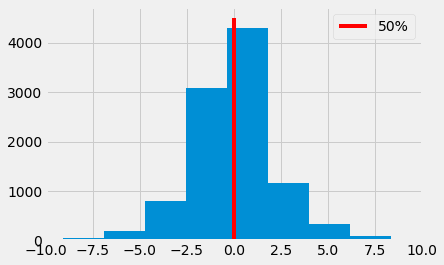

In [163]:
apple['Open Close % Change'].hist(bins=20)
plt.vlines(0, 0, 4500, colors='r', label = '50%')
plt.xlim(-10, 10)
plt.legend();

In [164]:
apple['Open Close % Change'].quantile([0.84])

0.84    1.83602
Name: Open Close % Change, dtype: float64

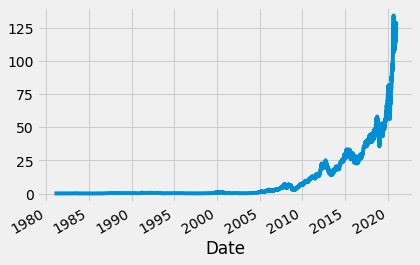

In [165]:
apple['Close'].plot();

In [166]:
def decision(p):
    if p > 1.5:
        return 1
    elif p < -0.75:
        return -1
    else:
        return 0

In [167]:
apple['Buy Hold Sell'] = apple.apply(lambda x: decision(x[10]), axis = 1)

In [168]:
apple.sample(10)

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close,Open Close % Change,Buy Hold Sell
Date,,,,,,,,,,,,
1981-07-10,0.099888,0.099330,0.099888,0.099330,55171200.0,0.078232,0.107701,-0.000558,-0.007812,0.021098,-0.558657,0
2008-05-27,6.658214,6.494286,6.526786,6.658214,789905200.0,5.743714,6.470357,0.163929,0.056429,0.914500,2.013675,1
1981-12-23,0.097656,0.097098,0.097656,0.097098,28896000.0,0.076474,0.099330,-0.000558,-0.001674,0.020624,-0.571426,0
2002-04-02,0.433929,0.426250,0.428571,0.429821,203795200.0,0.370786,0.436786,0.007679,-0.008214,0.059036,0.291666,0
2019-10-30,61.325001,60.302502,61.189999,60.814999,124522000.0,60.113815,60.822498,-1.022499,0.367500,0.701183,-0.612845,0
2016-09-09,26.430000,25.782499,26.160000,25.782499,186228000.0,24.293482,26.379999,-0.647501,-0.219999,1.489017,-1.443045,-1
1984-10-05,0.113281,0.110491,0.113281,0.111049,97574400.0,0.087462,0.113281,-0.002790,0.000000,0.023587,-1.970442,-1
1996-09-16,0.205357,0.190848,0.191964,0.199777,244652800.0,0.172338,0.187500,0.014509,0.004464,0.027439,4.069767,1
1994-10-24,0.385045,0.373884,0.381696,0.377232,204500800.0,0.320786,0.380580,-0.011161,0.001116,0.056446,-1.169594,-1


In [169]:
# Min Max Normalization of Features
vol_max = apple['Volume'].max()
vol_min = apple['Volume'].min()
apple['Volume Norm'] = (apple['Volume'] - vol_min) / (vol_max - vol_min)

daily_max = apple['Max Daily Change'].max()
daily_min = apple['Max Daily Change'].min()
apple['Max Daily Change Norm'] = (apple['Max Daily Change'] - daily_min) / (daily_max - daily_min)

inter_max = apple['Interday Change'].max()
inter_min = apple['Interday Change'].min()
apple['Interday Change Norm'] = (apple['Interday Change'] - inter_min) / (inter_max - inter_min)

adj_max = apple['Close Adjusted Close'].max()
adj_min = apple['Close Adjusted Close'].min()
apple['Close Adjusted Close Norm'] = (apple['Close Adjusted Close'] - adj_min) / (adj_max - adj_min)

apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close,Open Close % Change,Buy Hold Sell,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm
Date,,,,,,,,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348,0.027262,0.000000,0,0.063023,0.461562,0.581742,0.008135
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348,-0.000558,-0.006138,0.025839,-0.456625,0,0.023516,0.461515,0.573176,0.007711
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652,-0.000558,-0.008371,0.023943,-0.492609,0,0.014061,0.461515,0.573034,0.007145
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790,0.024535,0.000000,0,0.011462,0.461562,0.573745,0.007321
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348,0.025247,0.000000,0,0.009711,0.461562,0.573780,0.007534


In [170]:
apple['Buy Hold Sell Shift1 Up'] = apple['Buy Hold Sell'].shift(-1, fill_value=0).astype(int)
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Shift1_DOwn,Max Daily Change,Interday Change,Close Adjusted Close,Open Close % Change,Buy Hold Sell,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm,Buy Hold Sell Shift1 Up
Date,,,,,,,,,,,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101087,0.000000,0.000558,0.128348,0.027262,0.000000,0,0.063023,0.461562,0.581742,0.008135,0
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095813,0.128348,-0.000558,-0.006138,0.025839,-0.456625,0,0.023516,0.461515,0.573176,0.007711,0
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088780,0.121652,-0.000558,-0.008371,0.023943,-0.492609,0,0.014061,0.461515,0.573034,0.007145,0
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090978,0.112723,0.000558,0.002790,0.024535,0.000000,0,0.011462,0.461562,0.573745,0.007321,0
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093615,0.115513,0.000558,0.003348,0.025247,0.000000,0,0.009711,0.461562,0.573780,0.007534,0


In [171]:
# Select features
apple.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Close_Shift1_DOwn', 'Max Daily Change', 'Interday Change',
       'Close Adjusted Close', 'Open Close % Change', 'Buy Hold Sell',
       'Volume Norm', 'Max Daily Change Norm', 'Interday Change Norm',
       'Close Adjusted Close Norm', 'Buy Hold Sell Shift1 Up'],
      dtype='object')

In [172]:
apple_ = apple[['Volume Norm'
                , 'Max Daily Change Norm'
                , 'Interday Change Norm'
                , 'Close Adjusted Close Norm'
                , 'Buy Hold Sell Shift1 Up'
               ]
              ].reset_index(drop=True)

In [173]:
apple_.head()

,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm,Buy Hold Sell Shift1 Up
0,0.063023,0.461562,0.581742,0.008135,0
1,0.023516,0.461515,0.573176,0.007711,0
2,0.014061,0.461515,0.573034,0.007145,0
3,0.011462,0.461562,0.573745,0.007321,0
4,0.009711,0.461562,0.573780,0.007534,0


In [174]:
apple_.shape

(10091, 5)

In [175]:
apple_['Buy Hold Sell Shift1 Up'].value_counts()

 0    4886
-1    3265
 1    1940
Name: Buy Hold Sell Shift1 Up, dtype: int64

In [176]:
10091*.10/3

336.3666666666667

In [178]:
buy_idxs = list(apple_[apple_['Buy Hold Sell Shift1 Up'] == 1].sample(336).index)
hold_idxs = list(apple_[apple_['Buy Hold Sell Shift1 Up'] == 0].sample(336).index)
sell_idxs = list(apple_[apple_['Buy Hold Sell Shift1 Up'] == -1].sample(336).index)

In [179]:
test_idxs = buy_idxs + hold_idxs + sell_idxs
len(test_idxs)

1008

In [180]:
apple_test = apple_.iloc[test_idxs]
apple_test['Buy Hold Sell Shift1 Up'].value_counts()

-1    336
 1    336
 0    336
Name: Buy Hold Sell Shift1 Up, dtype: int64

In [181]:
apple_train = apple_.drop(test_idxs, axis = 0)
apple_train.shape

(9083, 5)

In [183]:
10091-336*3

9083

In [184]:
apple_test = apple_test.sample(frac=1).reset_index(drop=True)
apple_test.head()

,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm,Buy Hold Sell Shift1 Up
0,0.010098,0.385036,0.523885,0.000000,0
1,0.222110,0.468954,0.573408,0.255223,-1
2,0.026069,0.462008,0.573993,0.020398,0
3,0.028654,0.462477,0.573283,0.032895,1
4,0.056696,0.460319,0.573638,0.014683,1


In [185]:
apple_test['Buy Hold Sell Shift1 Up'].value_counts()

-1    336
 1    336
 0    336
Name: Buy Hold Sell Shift1 Up, dtype: int64

In [186]:
targets = list(apple_train['Buy Hold Sell Shift1 Up'].value_counts().index)
targets_counts = list(apple_train['Buy Hold Sell Shift1 Up'].value_counts().values)

In [187]:
targets

[0, -1, 1]

In [188]:
targets_counts

[4550, 2929, 1604]

In [189]:
from sklearn.utils import resample

In [190]:
X_major = apple_train[apple_train['Buy Hold Sell Shift1 Up'] == 0]
X1_minor = apple_train[apple_train['Buy Hold Sell Shift1 Up'] == -1]
X2_minor = apple_train[apple_train['Buy Hold Sell Shift1 Up'] == 1]

X1_minor_upsampled = resample(X1_minor
                              , replace = True
                              , n_samples = targets_counts[0]
                              , random_state = 42
                             )

X2_minor_upsampled = resample(X2_minor
                              , replace = True
                              , n_samples = targets_counts[0]
                              , random_state = 42
                             )

apple_train_upsampled = pd.concat([X_major, X1_minor_upsampled, X2_minor_upsampled])

In [191]:
apple_train_upsampled['Buy Hold Sell Shift1 Up'].value_counts()

-1    4550
 1    4550
 0    4550
Name: Buy Hold Sell Shift1 Up, dtype: int64

In [192]:
apple_train_upsampled = apple_train_upsampled.sample(frac = 1).reset_index(drop=True)
apple_train_upsampled.head()

,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm,Buy Hold Sell Shift1 Up
0,0.018276,0.461867,0.573496,0.008462,-1
1,0.024263,0.461966,0.573601,0.010832,0
2,0.030838,0.460037,0.573709,0.026660,-1
3,0.001147,0.461585,0.573816,0.006968,0
4,0.023803,0.608239,0.420064,0.056707,-1


In [193]:
X_train = apple_train_upsampled.drop('Buy Hold Sell Shift1 Up', axis = 1)
X_test = apple_test.drop('Buy Hold Sell Shift1 Up', axis = 1)
y_train = apple_train_upsampled['Buy Hold Sell Shift1 Up']
y_test = apple_test['Buy Hold Sell Shift1 Up']

In [194]:
X_train.head()

,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm
0,0.018276,0.461867,0.573496,0.008462
1,0.024263,0.461966,0.573601,0.010832
2,0.030838,0.460037,0.573709,0.026660
3,0.001147,0.461585,0.573816,0.006968
4,0.023803,0.608239,0.420064,0.056707


In [195]:
X_train.shape

(13650, 4)

In [196]:
X_test.head()

,Volume Norm,Max Daily Change Norm,Interday Change Norm,Close Adjusted Close Norm
0,0.010098,0.385036,0.523885,0.000000
1,0.222110,0.468954,0.573408,0.255223
2,0.026069,0.462008,0.573993,0.020398
3,0.028654,0.462477,0.573283,0.032895
4,0.056696,0.460319,0.573638,0.014683


In [197]:
X_test.shape

(1008, 4)

In [198]:
y_train.head()

0   -1
1    0
2   -1
3    0
4   -1
Name: Buy Hold Sell Shift1 Up, dtype: int64

In [199]:
y_train.shape

(13650,)

In [200]:
y_test.head()

0    0
1   -1
2    0
3    1
4    1
Name: Buy Hold Sell Shift1 Up, dtype: int64

In [201]:
y_test.shape

(1008,)

In [202]:
# https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [203]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = OneVsRestClassifier(RandomForestClassifier(n_estimators = 300
                                                 , random_state = 42
                                                 , n_jobs = -1
                                                 , verbose = 0
                                                ))
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
pred_probs = rfc.predict_proba(X_test)
from sklearn import metrics
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.4107142857142857


In [205]:
apple_ = apple_.sample(frac=1).reset_index(drop=True)
from sklearn.model_selection import cross_val_score
cvals = cross_val_score(rfc
                       , apple_.drop('Buy Hold Sell Shift1 Up', axis=1)
                       , apple_['Buy Hold Sell Shift1 Up']
                       , scoring = 'accuracy'
                       , cv = 10
                       , n_jobs = -1
                       , verbose = 0
                      )
print(f'10 Fold Cross-Validation Score for First RF Model: {np.mean(cval)}')

10 Fold Cross-Validation Score for First RF Model: 0.49331266129586204


In [206]:
cvals

array([0.5019802 , 0.47770069, 0.48166501, 0.46481665, 0.46778989,
       0.48166501, 0.47770069, 0.50941526, 0.46878097, 0.46283449])

In [36]:
from sklearn.metrics import (roc_auc_score
                             , precision_score
                             , recall_score
                             , roc_curve
                             , confusion_matrix
                             , plot_confusion_matrix
                             , precision_recall_curve
                             , auc
                            )

In [37]:
y_probs = rfc.predict_proba(X_test)[:, 1]
y_probs

array([0.05050505, 0.03157895, 0.02020202, ..., 0.13392857, 0.08653846,
       0.71276596])

In [38]:
# roc_score1 = roc_auc_score(y_test
#                            , y_probs
#                            , multi_class = 'ovr'
#                            , average = 'macro'
#                           )
# roc_score1

In [39]:
rfc.feature_importances_

AttributeError: 'OneVsRestClassifier' object has no attribute 'feature_importances_'

In [ ]:
feature_imp = pd.Series(rfc.feature_importances_, index=apple_upsampled.columns[:4]).sort_values(ascending=False)
feature_imp

In [ ]:
import seaborn as sns
sns.barplot(x=feature_imp
            , y=feature_imp.index
           );

In [ ]:
# Drop 'Interday Change Norm' Column
apple_upsampled_reduced = apple_upsampled.drop('Interday Change Norm', axis =1)
apple_upsampled_reduced.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(apple_upsampled_reduced.drop('Buy Hold Sell Shift1 Down', axis=1)
                                                    , apple_upsampled_reduced['Buy Hold Sell Shift1 Down']
                                                    , test_size = 0.1
                                                    , random_state = 42
                                                   )

In [ ]:
# rfcr for Random Forest Classifier Reduced
rfcr = RandomForestClassifier(n_estimators = 100)
rfcr.fit(X_train, y_train)
y_pred = rfcr.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

In [ ]:
cvalr = cross_val_score(rfcr
                       , apple_upsampled_reduced.drop('Buy Hold Sell Shift1 Down', axis=1)
                       , apple_upsampled_reduced['Buy Hold Sell Shift1 Down']
                       , scoring = 'accuracy'
                       , cv = 7
                      )
print(f'7 Fold Cross-Validation Score for Reduced RF Model: {np.mean(cvalr)}')